In [156]:
import pandas as pd
import matplotlib.pyplot as plt
from six import StringIO
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn import tree
import six
import sys
sys.modules['sklearn.externals.six'] = six
df = pd.read_csv("C:\\Users\\reauter\\Documents\\Data_Binning.csv")
#df.columns = ["Full_Code","Name", "Code","L.Trade", "Bid Vol","Bid","Ask","Ask Vol","Volume","High","Low","P.Close","+/- %"]
df.drop(df.columns[8:10], axis=1, inplace=True)
df

,Date,Time,Open,High,Low,Close,Volume,Close-Open,Unnamed: 10,Hour,Minute,AM/PM,Consider
0,6/2/2022,12:00:00,35571.20,35612.00,35543.50,35562.00,52975,0.00,NaN,12,0,12:00 PM,False
1,6/2/2022,12:15:00,35562.00,35589.00,35539.70,35551.60,56575,-4.10,NaN,12,15,12:00 PM,True
2,6/2/2022,12:30:00,35555.70,35623.45,35545.05,35595.00,71075,-8.00,NaN,12,30,12:00 PM,True
3,6/2/2022,12:45:00,35603.00,35675.00,35570.00,35600.00,113375,-3.55,NaN,12,45,12:00 PM,True
4,6/2/2022,13:00:00,35603.55,35627.60,35570.40,35610.00,51825,3.90,NaN,1,0,12:00 PM,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,6/17/2022,10:30:00,32635.00,32694.45,32615.10,32646.75,89825,-8.25,NaN,10,30,12:00 AM,False
273,6/17/2022,10:45:00,32655.00,32792.85,32633.00,32706.90,124325,4.90,NaN,10,45,12:00 AM,False
274,6/17/2022,11:00:00,32702.00,32758.05,32660.00,32723.95,61300,-4.35,NaN,11,0,12:00 AM,False
275,6/17/2022,11:15:00,32728.30,32771.00,32676.95,32715.00,71275,-0.05,NaN,11,15,12:00 AM,False


In [157]:
#To get information about null values. 
#If the zero values are low, they must be discarded
print(df.isnull().sum())
#It is necessary to study the data types of data columns.
#Understanding data types ensures that data is collected 
#in the preferred format and the value of each property is as expected.
print(df.dtypes)

Date             0
Time             0
Open             0
High             0
Low              0
Close            0
Volume           0
Close-Open       0
Unnamed: 10    277
Hour             0
Minute           0
AM/PM            0
Consider         0
dtype: int64
Date            object
Time            object
Open           float64
High           float64
Low            float64
Close          float64
Volume           int64
Close-Open     float64
Unnamed: 10    float64
Hour             int64
Minute           int64
AM/PM           object
Consider          bool
dtype: object


In [158]:
#It is clear that the "Expire Date" column is given as objects instead of date format
df["Date"] = pd.to_datetime(df["Date"], dayfirst = True).dt.date
#Now we need to divide the Expire Date column into columns by years and months. 
#It is importanat step cause entire date is based upon year 2021
#If we divide the date into year and month we can nalyse the change in data on the basis of month
df["Year"]=pd.to_datetime(df["Date"]).dt.year
df["Month"]=pd.to_datetime(df["Date"]).dt.month

In [159]:
df["Year"]

0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
272    2022
273    2022
274    2022
275    2022
276    2022
Name: Year, Length: 277, dtype: int64

In [160]:
df["Month"]

0      2
1      2
2      2
3      2
4      2
      ..
272    6
273    6
274    6
275    6
276    6
Name: Month, Length: 277, dtype: int64

Month
2     35626.530000
3     35684.986000
6     33693.637132
7     35062.376923
8     35182.572000
9     34914.006000
10    34591.600000
Name: Close, dtype: float64


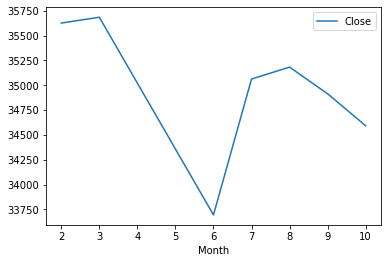

In [161]:
print(df.groupby("Month")["Close"].mean())
monthmean=df.groupby("Month")["Close"].mean().reset_index()
datamonth=monthmean.set_index("Month")
sns.lineplot(data=datamonth)
plt.xlabel="Month"
plt.ylabel="Close"
plt.title=("Average Close by months")
plt.show()

Date
2022-02-06    35626.530000
2022-03-06    35684.986000
2022-06-06    35376.432692
2022-06-13    33380.750000
2022-06-14    33432.718000
2022-06-15    33447.356000
2022-06-16    33140.502000
2022-06-17    32681.500000
2022-07-06    35062.376923
2022-08-06    35182.572000
2022-09-06    34914.006000
2022-10-06    34591.600000
Name: Close, dtype: float64


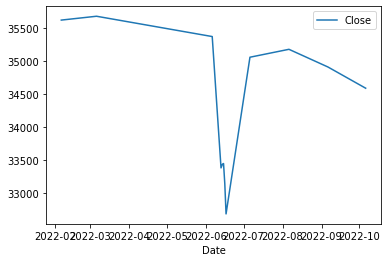

In [162]:
print(df.groupby("Date")["Close"].mean())
monthmean=df.groupby("Date")["Close"].mean().reset_index()
datamonth=monthmean.set_index("Date")
sns.lineplot(data=datamonth)
plt.xlabel="Date"
plt.ylabel="Close"
plt.title=("Average Close by date")
plt.show()

In [163]:
#Binning by distance
min_value = df['Close'].min()
max_value = df['Close'].max()
print(min_value)
print(max_value)

32413.65
35912.2


In [164]:
'''
Now we can calculate the range of each interval, i.e. the minimum and maximum value of each interval.
Since we have 3 groups, we need 4 edges of intervals (bins):

small — (edge1, edge2)
medium — (edge2, edge3)
big — (edge3, edge4)
'''
#We can use the linspace() function of the numpy package to calculate the 4 bins, equally distributed.
import numpy as np
bins = np.linspace(min_value,max_value,4)
bins

array([32413.65      , 33579.83333333, 34746.01666667, 35912.2       ])

In [165]:
labels = ['small', 'medium', 'big']

In [166]:
df['bins'] = pd.cut(df['Close'], bins=bins, labels=labels, include_lowest=True)

(array([142.,  34., 101.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

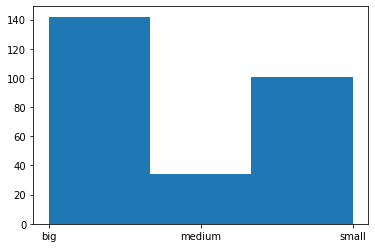

In [167]:
import matplotlib.pyplot as plt
plt.hist(df['bins'], bins=3)

In [168]:
df['hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
print (df)

           Date      Time      Open      High       Low     Close  Volume  \
0    2022-02-06  12:00:00  35571.20  35612.00  35543.50  35562.00   52975   
1    2022-02-06  12:15:00  35562.00  35589.00  35539.70  35551.60   56575   
2    2022-02-06  12:30:00  35555.70  35623.45  35545.05  35595.00   71075   
3    2022-02-06  12:45:00  35603.00  35675.00  35570.00  35600.00  113375   
4    2022-02-06  13:00:00  35603.55  35627.60  35570.40  35610.00   51825   
..          ...       ...       ...       ...       ...       ...     ...   
272  2022-06-17  10:30:00  32635.00  32694.45  32615.10  32646.75   89825   
273  2022-06-17  10:45:00  32655.00  32792.85  32633.00  32706.90  124325   
274  2022-06-17  11:00:00  32702.00  32758.05  32660.00  32723.95   61300   
275  2022-06-17  11:15:00  32728.30  32771.00  32676.95  32715.00   71275   
276  2022-06-17  11:30:00  32715.05  32768.15  32645.75  32667.70   69375   

     Close-Open  Unnamed: 10  Hour  Minute     AM/PM  Consider  Year  Month

In [169]:
df['hour'].head(20)

0     12
1     12
2     12
3     12
4     13
5     13
6     13
7     13
8     14
9     14
10    14
11    14
12    15
13    15
14    15
15     9
16     9
17    10
18    10
19    10
Name: hour, dtype: int64

In [170]:
'''
writer = pd.ExcelWriter('Data_Binning2.xlsx') 

df.to_excel(writer, sheet_name='Data_Binning2', header=None, index=False,
         startcol=1, startrow=2)
'''

"\nwriter = pd.ExcelWriter('Data_Binning2.xlsx') \n\ndf.to_excel(writer, sheet_name='Data_Binning2', header=None, index=False,\n         startcol=1, startrow=2)\n"

In [171]:
'''
with pd.ExcelWriter('Data_Binning2.xlsx') as writer:
    df.to_excel(writer, sheet_name='Sheet1')
'''

"\nwith pd.ExcelWriter('Data_Binning2.xlsx') as writer:\n    df.to_excel(writer, sheet_name='Sheet1')\n"

hour
9     34289.752273
10    34326.401136
11    34364.802326
12    34568.305682
13    34495.497727
14    34443.965909
15    34469.970833
Name: Close, dtype: float64


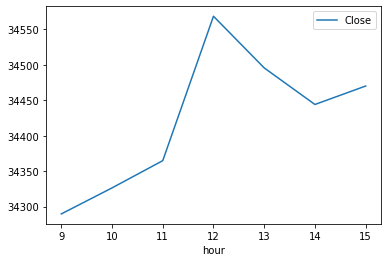

In [172]:
print(df.groupby("hour")["Close"].mean())
monthmean=df.groupby("hour")["Close"].mean().reset_index()
datamonth=monthmean.set_index("hour")
sns.lineplot(data=datamonth)
plt.xlabel="hour"
plt.ylabel="Close"
plt.title=("Average Close by hour")
plt.show()

hour
9       2.525000
10      0.163636
11    760.090698
12      0.643182
13      1.887500
14     -0.736364
15     28.990278
Name: Close-Open, dtype: float64


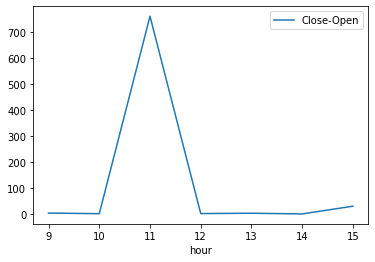

In [173]:
print(df.groupby("hour")["Close-Open"].mean())
monthmean=df.groupby("hour")["Close-Open"].mean().reset_index()
datamonth=monthmean.set_index("hour")
sns.lineplot(data=datamonth)
plt.xlabel="hour"
plt.ylabel="Close-Open"
plt.title=("Average Close-Open by hour")
plt.show()

In [174]:
df.loc[df['Close-Open'] <= abs(100), '<= 0'] = 'False'
df.loc[df['Close-Open'] > abs(100), '<= 0'] = 'True'

In [175]:
print(df)

           Date      Time      Open      High       Low     Close  Volume  \
0    2022-02-06  12:00:00  35571.20  35612.00  35543.50  35562.00   52975   
1    2022-02-06  12:15:00  35562.00  35589.00  35539.70  35551.60   56575   
2    2022-02-06  12:30:00  35555.70  35623.45  35545.05  35595.00   71075   
3    2022-02-06  12:45:00  35603.00  35675.00  35570.00  35600.00  113375   
4    2022-02-06  13:00:00  35603.55  35627.60  35570.40  35610.00   51825   
..          ...       ...       ...       ...       ...       ...     ...   
272  2022-06-17  10:30:00  32635.00  32694.45  32615.10  32646.75   89825   
273  2022-06-17  10:45:00  32655.00  32792.85  32633.00  32706.90  124325   
274  2022-06-17  11:00:00  32702.00  32758.05  32660.00  32723.95   61300   
275  2022-06-17  11:15:00  32728.30  32771.00  32676.95  32715.00   71275   
276  2022-06-17  11:30:00  32715.05  32768.15  32645.75  32667.70   69375   

     Close-Open  Unnamed: 10  Hour  Minute     AM/PM  Consider  Year  Month

In [176]:
df.to_csv('Data_Binning.csv', mode='a', index=False, header=False)

In [177]:

#df.loc[(df['<= 0'] == 'TRUE') | (df['First_name'] == 'Jay'), 'Status'] = 'Found' 
df.loc[(df['<= 0'] == 'TRUE') & (df['Time'] == '3:30:00 PM'), 'Status'] = 'Found' 
 
print (df)

           Date      Time      Open      High       Low     Close  Volume  \
0    2022-02-06  12:00:00  35571.20  35612.00  35543.50  35562.00   52975   
1    2022-02-06  12:15:00  35562.00  35589.00  35539.70  35551.60   56575   
2    2022-02-06  12:30:00  35555.70  35623.45  35545.05  35595.00   71075   
3    2022-02-06  12:45:00  35603.00  35675.00  35570.00  35600.00  113375   
4    2022-02-06  13:00:00  35603.55  35627.60  35570.40  35610.00   51825   
..          ...       ...       ...       ...       ...       ...     ...   
272  2022-06-17  10:30:00  32635.00  32694.45  32615.10  32646.75   89825   
273  2022-06-17  10:45:00  32655.00  32792.85  32633.00  32706.90  124325   
274  2022-06-17  11:00:00  32702.00  32758.05  32660.00  32723.95   61300   
275  2022-06-17  11:15:00  32728.30  32771.00  32676.95  32715.00   71275   
276  2022-06-17  11:30:00  32715.05  32768.15  32645.75  32667.70   69375   

     Close-Open  Unnamed: 10  Hour  Minute     AM/PM  Consider  Year  Month

In [178]:
df[df.Status == 'Found']

,Date,Time,Open,High,Low,Close,Volume,Close-Open,Unnamed: 10,Hour,Minute,AM/PM,Consider,Year,Month,bins,hour,<= 0,Status


In [179]:
#Binning by Frequency
df['bin_qcut'] = pd.qcut(df['Close'], q=3, precision=1, labels=labels)


In [188]:
#Sampling
'''
Sampling is another technique of data binning. 
It permits to reduce the number of samples, by grouping similar values or contiguous values.
There are three approaches to perform sampling:
by bin means: each value in a bin is replaced by the mean value of the bin.
by bin median: each bin value is replaced by its bin median value.
by bin boundary: each bin value is replaced by the closest boundary value, i.e. maximum or minimum value of the bin.
'''
'''
In order to perform sampling, the binned_statistic() function of the scipy.stats package can be used. 
This function receives two arrays as input, x_data and y_data,
as well as the statistics to be used (e.g. median or mean) and the number of bins to be created. 
The function returns the values of the bins as well as the edges of each bin.
'''
from scipy.stats import binned_statistic
x_data = np.arange(0,len(df))
#numpy.arange([start, ]stop, [step, ], dtype=None)
y_data = df['Close']
x_bins,bin_edges, misc = binned_statistic(y_data,x_data, statistic="median", bins=len(bins))

In [189]:
'''
Now we should approximate each value of the df['Close'] column to the median value of the corresponding bin. 
Thus we convert the bin edges to an IntervalIndex, which receives as index the left and right edges of each interval.
In our case, the left edges starts from the beginning of the bin edges and do not contain the last value of the bin edges. 
The right edges instead, start from the second value of the bin edges and last until the last value.
'''
bin_intervals = pd.IntervalIndex.from_arrays(bin_edges[:-1], bin_edges[1:])

In [190]:
'''
We can quantise the Close column by defining a set_to_median() function 
which loops through the intervals and when it finds the correct interval, 
it returns the mid value.
'''
def set_to_median(x, bin_intervals):
    for interval in bin_intervals:
        if x in interval:
            return interval.mid


In [191]:
'''
We use the apply() function to apply the set_to_median() to the Close column.
'''
df['sampled_close'] = df['Close'].apply(lambda x: set_to_median(x, bin_intervals))


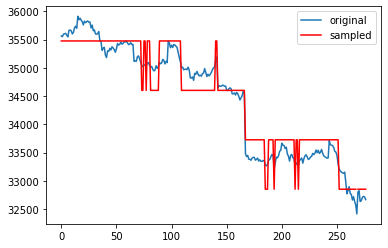

In [192]:
#Now we can plot results. We note the loss of information.
plt.plot(df['Close'], label='original')
plt.plot(df['sampled_close'], color='red', label='sampled')
plt.legend()
plt.show()

In [193]:
'''
Finally, we can plot the median values.
We can calculate the y values (y_bins) corresponding to the binned values (x_bins)
as the values at the center of the bin range.
'''
y_bins = (bin_edges[:-1]+bin_edges[1:])/2
y_bins


array([32850.96875, 33725.60625, 34600.24375, 35474.88125])

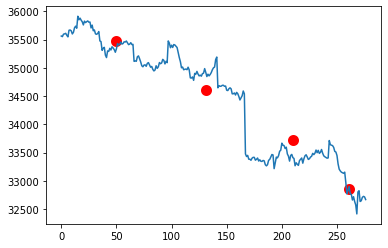

In [194]:
plt.plot(x_data,y_data)
plt.scatter(x_bins, y_bins,  color= 'red',linewidth=5)
plt.show()

In [195]:
df['sampled_close']

0      35474.88125
1      35474.88125
2      35474.88125
3      35474.88125
4      35474.88125
          ...     
272    32850.96875
273    32850.96875
274    32850.96875
275    32850.96875
276    32850.96875
Name: sampled_close, Length: 277, dtype: float64

In [ ]:
#we can interpret from the above graph is that the median values of the Close values is 32850.96875, 33725.60625,
#34600.24375, 35474.88125 
#if we segregate the values in four sections